## Graphs on each trainined model

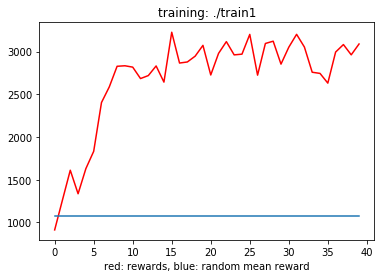

In [26]:
import os
import numpy as np
import random
import matplotlib.pyplot as plt
from supermario_dqn.environment import MarioEnvironment
import supermario_dqn.preprocess as pr

# compute some random rewards
env = MarioEnvironment(1, lambda s: pr.preprocess(s, 30, 30))
env.reset()
random_mean_reward = 0
for i in range(3):
    done = False
    env.reset()
    while not done:
        action = random.randint(0, env.n_actions - 1)
        _, r, done, _ = env.step(action)
        random_mean_reward += r
random_mean_reward = random_mean_reward / 3


train_dirs = [d[0] for d in os.walk('.') if 'train' in d[0]]
train_dirs.sort()

for train_dir in train_dirs:
    
    # load 
    loaded  = np.loadtxt(open(os.path.join(train_dir, 'episodes.csv')), delimiter=',', skiprows=1)
    rewards = loaded[:, 1]
    steps   = loaded[:, 2]
    
    len_rew = len(rewards) // 50
    rewards = rewards[:len_rew*50].reshape(-1, 50).mean(axis=1).reshape(-1)
    
    plt.title(f'training: {train_dir}')
    plt.plot(range(len_rew), rewards, 'r-')
    plt.plot(range(len_rew), [random_mean_reward] * len_rew)
    plt.xlabel('red: rewards, blue: random mean reward')
    plt.show()